<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Explainable-AI/SHAP_implementation_for_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import shap
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [3]:
# Load your trained model
model = load_model('/content/drive/My Drive/tumor_model/model_v1.h5')

In [18]:
# Dataset path
dataset_path = "/content/drive/MyDrive/Dataset Copy/Train"

target_size = (224, 224)
channels = 3

# Initialize arrays to hold data and labels
images = []
labels = []

# Map class names to numeric labels
class_mapping = {"Glioma": 0, "Meningioma": 1, "Pituitary": 2}

# Load and preprocess the dataset
for class_name, label in class_mapping.items():
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        # Read the image
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, target_size)
            if channels == 3 and img.shape[-1] == 3:
                images.append(img)
                labels.append(label)

In [19]:
# Convert to numpy arrays
images = np.array(images, dtype=np.float32) / 255.0  # Normalize pixel values
labels = np.array(labels, dtype=np.int32)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (1029, 224, 224, 3)
x_test: (441, 224, 224, 3)
y_train: (1029,)
y_test: (441,)


In [20]:
y_hat=model.predict(x_test)
print('Acc=',np.sum(y_hat.argmax(1)==y_test)/y_test.shape[0])

14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step
Acc= 0.9954648526077098


  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [04:00, 240.34s/it]              


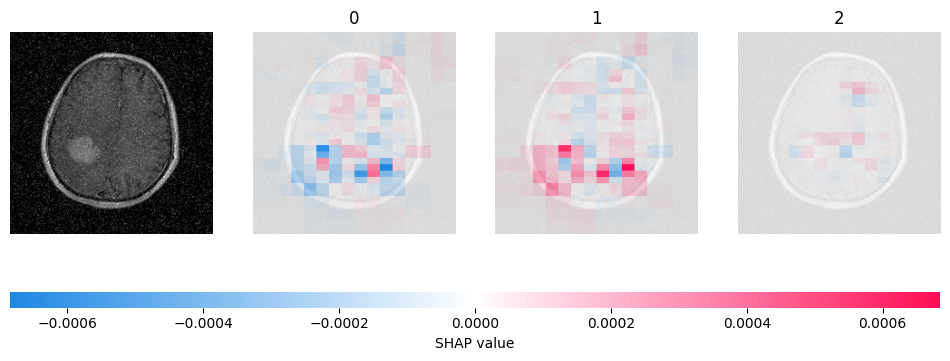

In [21]:
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(224,224)", x_test[0].shape)
explainer = shap.Explainer(f, masker_blur, output_names=list(range(3)))
ind=[200]
shap_values_ = explainer( x_test[ind], max_evals=5000, batch_size=50 )
shap.image_plot(shap_values_,labels=[0,1,2])